# Level 3 Task 3
Task: Data Visualization

Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).
Compare the average ratings of different cuisines
or cities using appropriate visualizations.
Visualize the relationship between various
features and the target variable to gain insights.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# About Data 
Data is takken from Kaggle
The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.

In [2]:
zomato_data = pd.read_csv("zomato.csv")
zomato_data.isnull().sum()
zomato_data.dropna(inplace=True)
zomato_data.isnull().sum()
zomato_data.drop_duplicates(inplace=True)
zomato_data.info()
zomato_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 23193 entries, 0 to 51715
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          23193 non-null  object
 1   address                      23193 non-null  object
 2   name                         23193 non-null  object
 3   online_order                 23193 non-null  object
 4   book_table                   23193 non-null  object
 5   rate                         23193 non-null  object
 6   votes                        23193 non-null  int64 
 7   phone                        23193 non-null  object
 8   location                     23193 non-null  object
 9   rest_type                    23193 non-null  object
 10  dish_liked                   23193 non-null  object
 11  cuisines                     23193 non-null  object
 12  approx_cost(for two people)  23193 non-null  object
 13  reviews_list                 23193 n

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Clean the rate column and convert it to numeric

In [3]:
zomato_data['rate'] = zomato_data['rate'].str.split('/').str[0].replace('NEW', None)
zomato_data['rate'] = zomato_data['rate'].replace('-', None)  
zomato_data['rate'] = pd.to_numeric(zomato_data['rate'], errors='coerce')

# Visualization 1: Distribution of Ratings

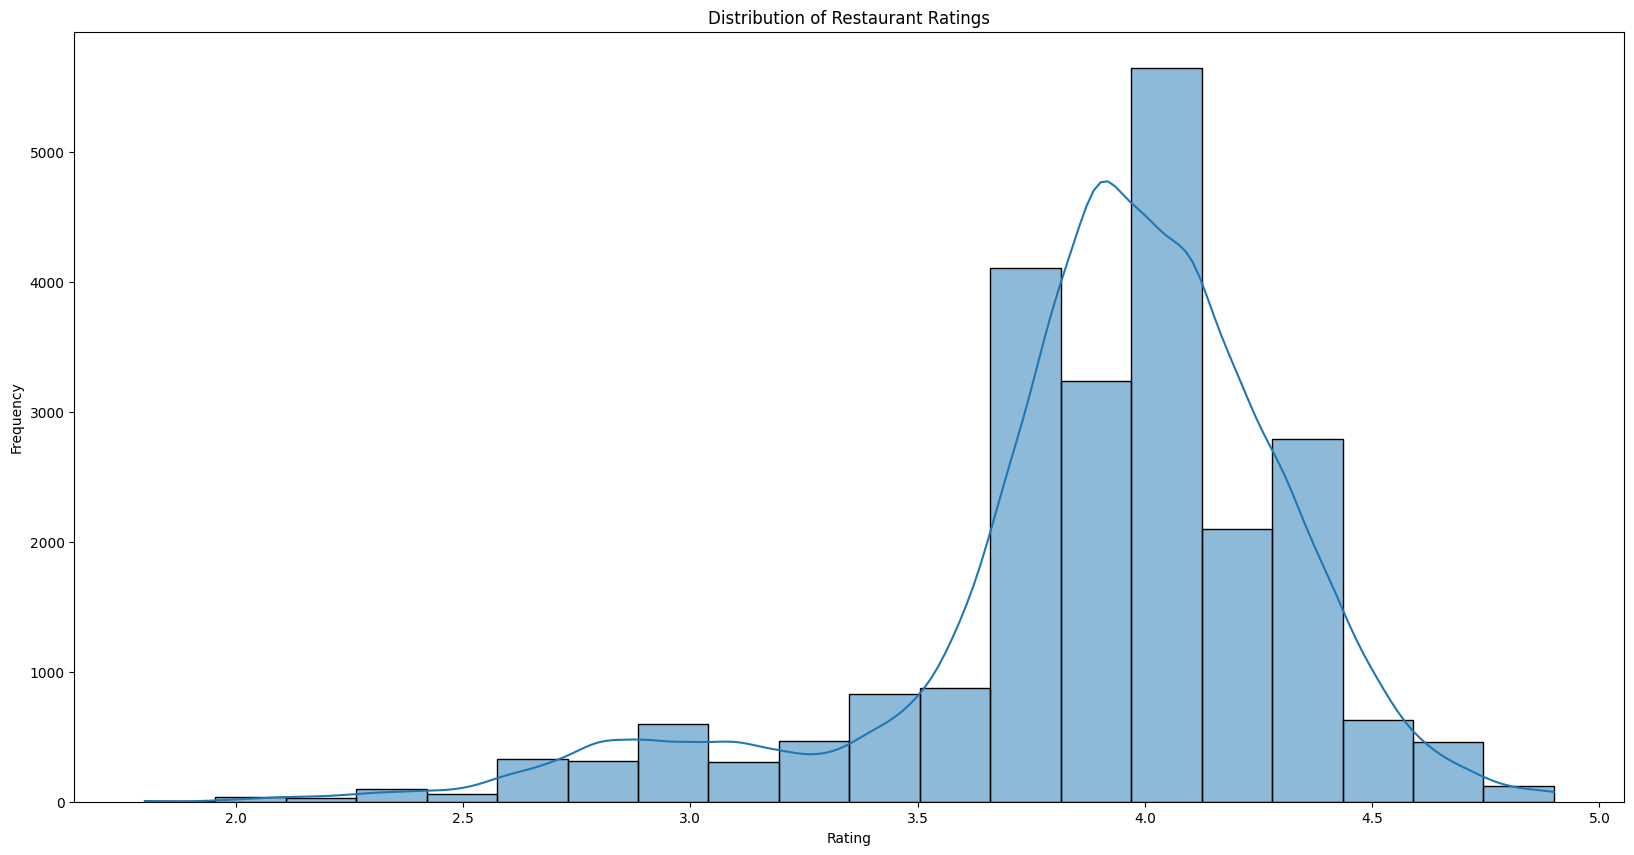

In [5]:
plt.figure(figsize=(20, 10))
sns.histplot(zomato_data['rate'], kde=True, bins=20)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Average Ratings of Different Cuisines

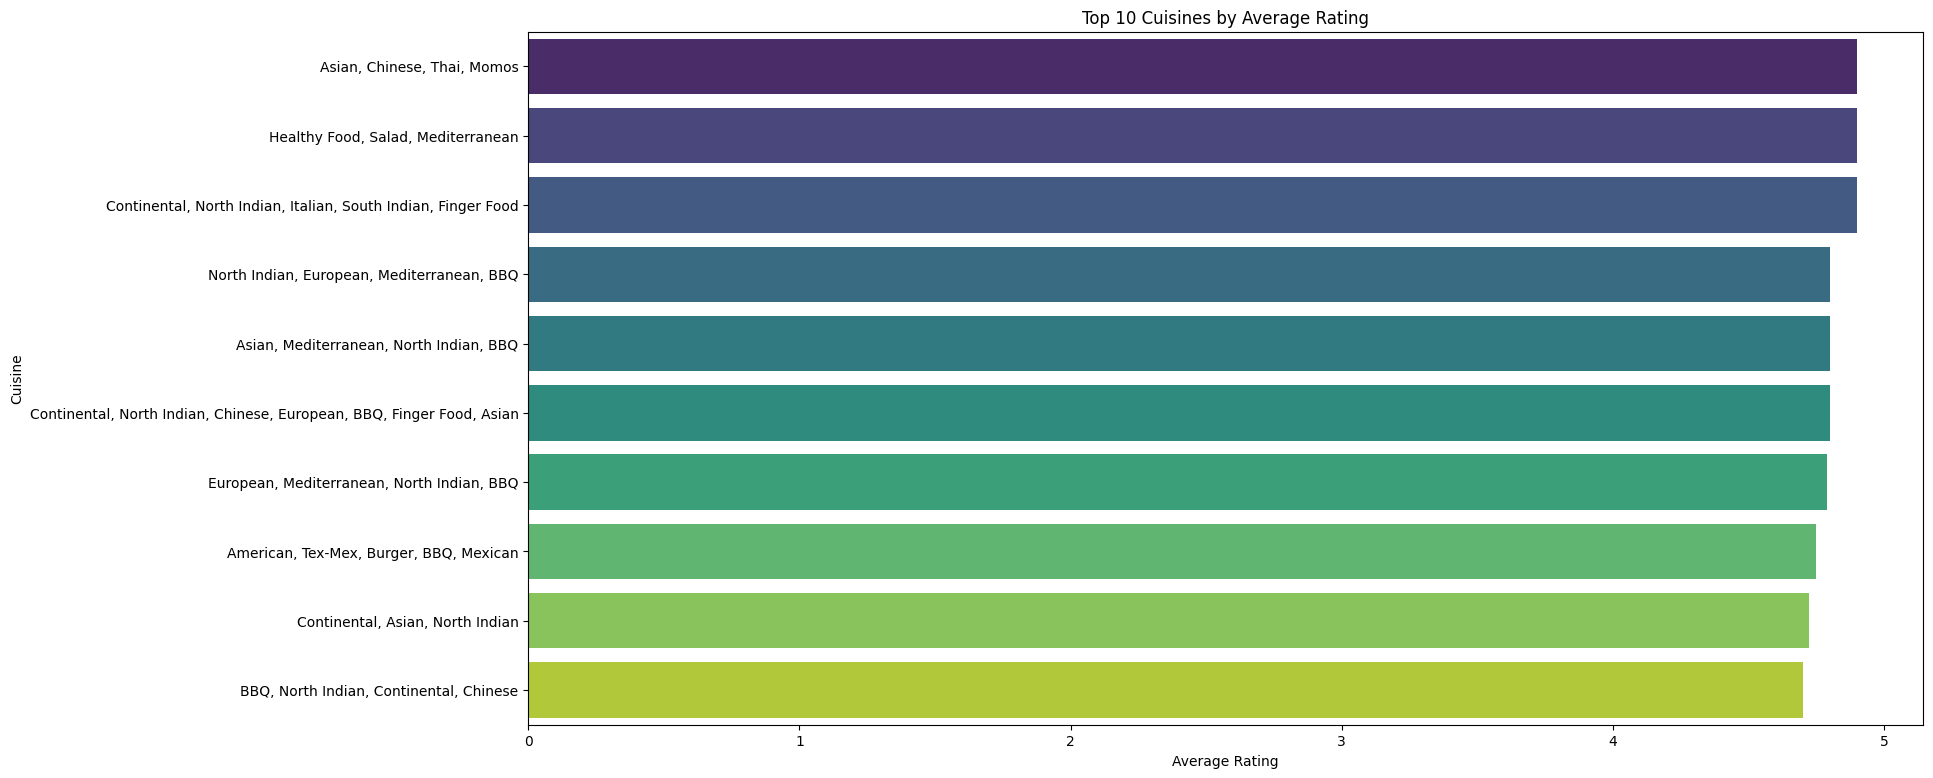

In [9]:
plt.figure(figsize=(18, 9))
sns.barplot(x=cuisine_ratings.values, y=cuisine_ratings.index, hue=cuisine_ratings.index, palette='viridis', legend=False)
plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine')
plt.show()


# Visualization 3: Relationship between Cost and Rating

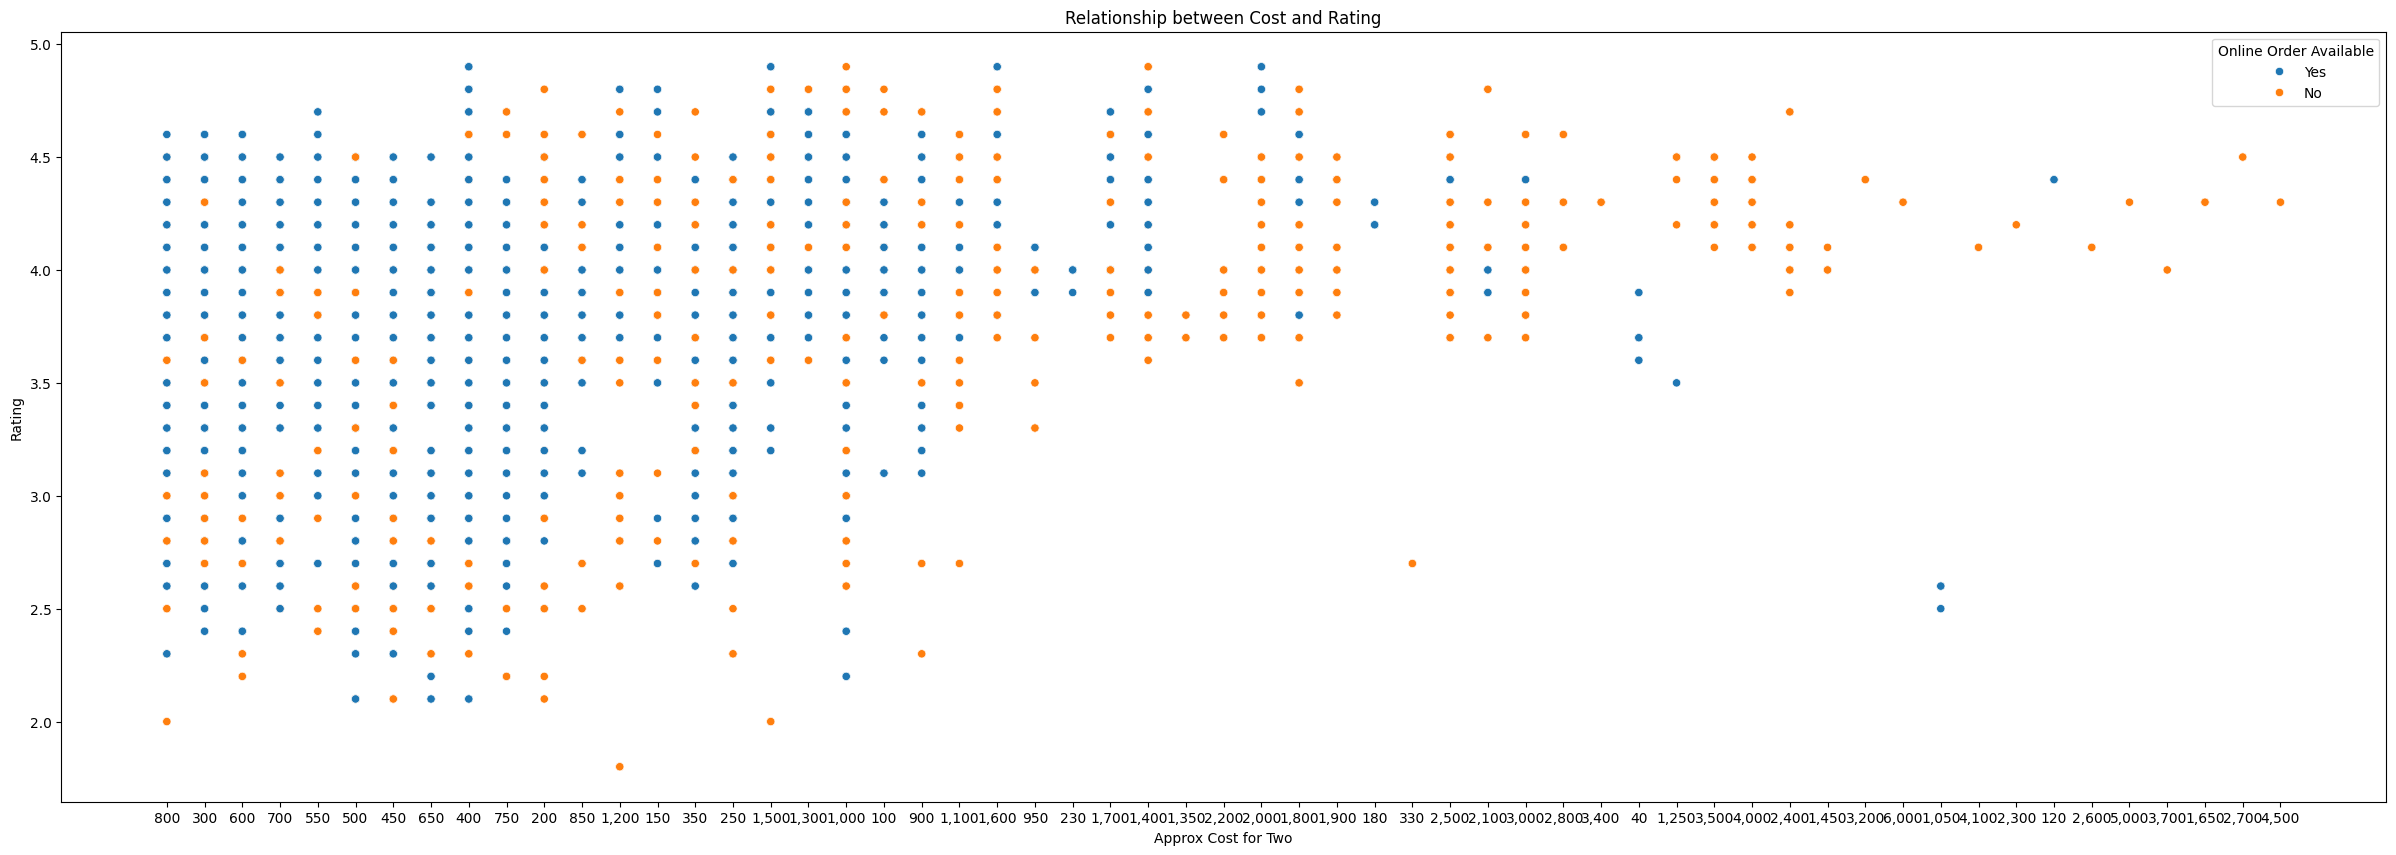

In [14]:
plt.figure(figsize=(30, 10))
sns.scatterplot(data=zomato_data, x='approx_cost(for two people)', y='rate', hue='online_order')
plt.title('Relationship between Cost and Rating')
plt.xlabel('Approx Cost for Two')
plt.ylabel('Rating')
plt.legend(title='Online Order Available')
plt.show()